# AmExpert 2021 – Machine Learning Hackathon

### Problem Statement:

XYZ Bank is a mid-sized private bank that includes a variety of banking products, such as savings accounts, current accounts, investment products, credit products, and home loans.

The Bank wants to predict the next set of products for a set of customers to optimize their marketing and communication campaigns.

The data available in this problem contains the following information:

* User Demographic Details : Gender, Age, Vintage, Customer Category etc.
* Current Product Holdings
* Product Holding in Next 6 Months (only for Train dataset)

Here, our task is to predict the next set of products (upto 3 products) for a set of customers (Test data) based on their demographics and current product holdings.

Dataset Description

**Train.csv**

* `Customer_ID - Unique ID for the customer` 
* `Gender - Gender of the Customer`
* `Age - Age of the Customer (in Years)`
* `Vintage - Vintage for the Customer (In Months)`
* `Is_Active - Activity Index, 0 :  Less frequent customer, 1 : More frequent customer`
* `City_Category - Encoded Category of customer's city`
* `Customer_Category - Encoded Category of the customer`
* `Product_Holding_B1 - Current Product Holding (Encoded)`
* `Product_Holding_B2 - Product Holding in next six months (Encoded) - Target Column`
 

**Test.csv**

* `Customer_ID - Unique ID for the customer` 
* `Gender - Gender of the Customer`
* `Age - Age of the Customer (in Years)`
* `Vintage - Vintage for the Customer (In Months)`
* `Is_Active - Activity Index, 0 :  Less frequent customer, 1 : More frequent customer`
* `City_Category - Encoded Category of customer's city`
* `Customer_Category - Encoded Category of the customer`
* `Product_Holding_B1 - Current Product Holding (Encoded)`


Evaluation Metric

The evaluation metric is **Mean Average Precision** (MAP) at K (K = 3). MAP is a well-known metric used to evaluate ranked retrieval results. E.g. Let’s say for a given customer, we recommended 3 products and only 1st and 3rd products are correct. So, the result would look like — 1, 0, 1

In this case, The precision at 1 will be: 1*1/1 = 1 The precision at 2 will be: 0*1/2 The precision at 3 will be: 1*2/3 = 0.67 Average Precision will be: (1 + 0 + 0.67)/3 = 0.556.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statistics as st
import seaborn as sns

In [2]:
#loading train and test dataset
train = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\PROJECTS\\American Express\\train_go05W65.csv")
test = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\PROJECTS\\American Express\\test_VkM91FT.csv")
print(f"The number of rows in the train data are \033[1m{train.shape[0]}\033[0m whereas in the test data are \033[1m{test.shape[0]}\033[0m"
     f"\nThe total Number of features given in the data are {train.shape[1]}.")

The number of rows in the train data are 37748 whereas in the test data are 20327
The total Number of features given in the data are 9.


In [3]:
train.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37748 entries, 0 to 37747
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         37748 non-null  object
 1   Gender              37748 non-null  object
 2   Age                 37748 non-null  int64 
 3   Vintage             37748 non-null  int64 
 4   Is_Active           37748 non-null  int64 
 5   City_Category       37748 non-null  object
 6   Customer_Category   37748 non-null  object
 7   Product_Holding_B1  37748 non-null  object
 8   Product_Holding_B2  37748 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [5]:
test.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1
0,CC372708,Female,31,31,0,C2,S3,"['P12', 'P13']"
1,CC216072,Male,28,37,1,C1,S2,"['P12', 'P13']"
2,CC387629,Male,31,12,0,C2,S3,['P20']
3,CC389228,Female,55,11,0,C2,S2,"['P13', 'P21']"
4,CC394445,Male,51,49,1,C2,S1,['P13']


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20327 entries, 0 to 20326
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         20327 non-null  object
 1   Gender              20327 non-null  object
 2   Age                 20327 non-null  int64 
 3   Vintage             20327 non-null  int64 
 4   Is_Active           20327 non-null  int64 
 5   City_Category       20327 non-null  object
 6   Customer_Category   20327 non-null  object
 7   Product_Holding_B1  20327 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [7]:
#checking missing values of the train dataset
train.isna().sum()/train.shape[0]*100

Customer_ID           0.0
Gender                0.0
Age                   0.0
Vintage               0.0
Is_Active             0.0
City_Category         0.0
Customer_Category     0.0
Product_Holding_B1    0.0
Product_Holding_B2    0.0
dtype: float64

In [8]:
#checking missing values of the test dataset
test.isna().sum()/train.shape[0]*100

Customer_ID           0.0
Gender                0.0
Age                   0.0
Vintage               0.0
Is_Active             0.0
City_Category         0.0
Customer_Category     0.0
Product_Holding_B1    0.0
dtype: float64

In [9]:
# making a copy of train and test data
df1 = train.copy()
df2 = test.copy()

# Feature Engineering
Looking at the train data csv file, we can see that the company has 22 products from P00 to P21. We need to create encoded columns for each product.

In [10]:
#creating columns for train and test data
for i in range(22):
    colname='P'+str(i)
    df1[colname] = 0
    
for i in range(22):
    colname='P'+str(i)
    df2[colname] = 0

In [11]:
#populating encoded columns with binary variables
for i in range (9,31):
    df1.iloc[:,i]=train['Product_Holding_B1'].str.contains(str(i-9))
for i in range (8,30):
    df2.iloc[:,i]=test['Product_Holding_B1'].str.contains(str(i-8))

In [12]:
df1.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2,P0,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8'],False,...,False,False,False,False,True,False,False,False,False,False
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3'],True,...,False,True,False,False,False,False,False,False,True,False
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00'],False,...,False,False,False,False,False,False,False,False,False,False
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6'],False,...,False,True,False,False,False,False,False,False,False,False
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']",False,...,False,False,False,False,True,True,False,False,False,True


In [13]:
df2.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,P0,P1,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21
0,CC372708,Female,31,31,0,C2,S3,"['P12', 'P13']",False,True,...,True,True,False,False,False,False,False,False,False,False
1,CC216072,Male,28,37,1,C1,S2,"['P12', 'P13']",False,True,...,True,True,False,False,False,False,False,False,False,False
2,CC387629,Male,31,12,0,C2,S3,['P20'],True,False,...,False,False,False,False,False,False,False,False,True,False
3,CC389228,Female,55,11,0,C2,S2,"['P13', 'P21']",False,True,...,False,True,False,False,False,False,False,False,False,True
4,CC394445,Male,51,49,1,C2,S1,['P13'],False,True,...,False,True,False,False,False,False,False,False,False,False


In [14]:
#creating blank encoded columns for train data Product_Holding_B2
for i in range(22):
    colname='T'+str(i)
    df1[colname] = 0
df1.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2,P0,...,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8'],False,...,0,0,0,0,0,0,0,0,0,0
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3'],True,...,0,0,0,0,0,0,0,0,0,0
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00'],False,...,0,0,0,0,0,0,0,0,0,0
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6'],False,...,0,0,0,0,0,0,0,0,0,0
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']",False,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#populating encoded columns with binary variables in train data Product_Holding_B2
for i in range (31,53):
    df1.iloc[:,i]=train['Product_Holding_B1'].str.contains(str(i-31))
df1.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2,P0,...,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8'],False,...,False,False,False,False,True,False,False,False,False,False
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3'],True,...,False,True,False,False,False,False,False,False,True,False
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00'],False,...,False,False,False,False,False,False,False,False,False,False
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6'],False,...,False,True,False,False,False,False,False,False,False,False
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']",False,...,False,False,False,False,True,True,False,False,False,True


In [16]:
#dropping Product_Holding_B1 and Product_Holding_B2 from train and test data
df1 = df1.drop('Product_Holding_B1',axis=1)
df1 = df1.drop('Product_Holding_B2',axis=1)
df2 = df2.drop('Product_Holding_B1',axis=1)

In [17]:
#typecasting of the features

df1['Customer_ID'] = df1['Customer_ID'].astype('category')
df2['Customer_ID'] = df2['Customer_ID'].astype('category')

df1['Gender'] = df1['Gender'].astype('category')
df2['Gender'] = df2['Gender'].astype('category')

df1['Is_Active'] = df1['Is_Active'].astype('category')
df2['Is_Active'] = df2['Is_Active'].astype('category')

df1['City_Category'] = df1['City_Category'].astype('category')
df2['City_Category'] = df2['City_Category'].astype('category')

df1['Customer_Category'] = df1['Customer_Category'].astype('category')
df2['Customer_Category'] = df2['Customer_Category'].astype('category')

Now that we have typecasted the columns, we will now segregate the numerical and categorical columns for the EDA.

In [18]:
num_col = list(df1.select_dtypes(include = ['int64']).columns)
cat_col = list(df1.select_dtypes(exclude = ['int64']).columns)
print(f"There are total {len(num_col)} numerical columns and {len(cat_col)} categorical columns.")

There are total 2 numerical columns and 49 categorical columns.


## Exploratory Data Analysis:
We will now begin the EDA.
### Univariate Analysis of Numeical Features-
First of all, we look at the distribution of the numerical columns:

In [19]:
plt.style.use('default')

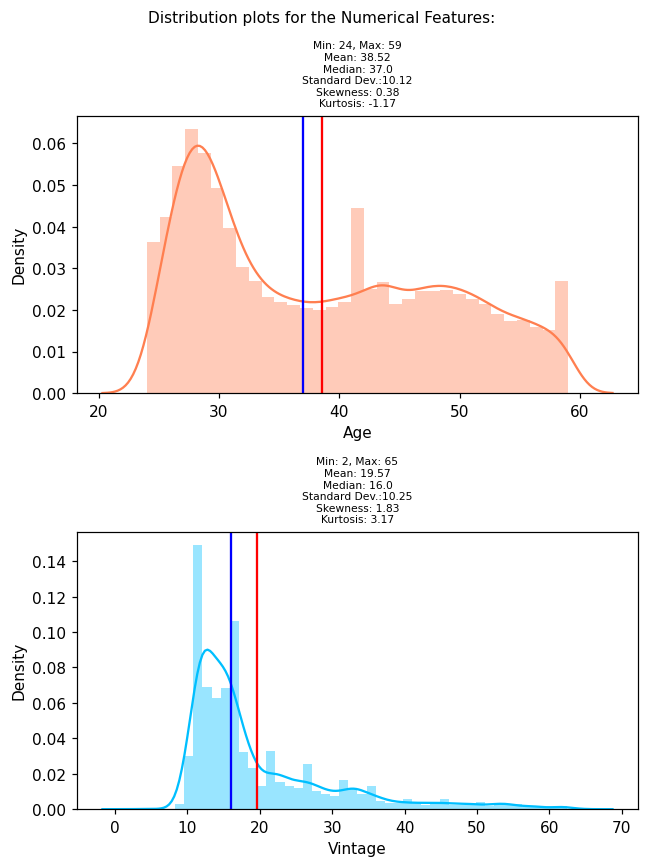

In [20]:
num_colour = ['coral','deepskyblue']
plt.figure(figsize = (6, 4*len(num_col)), dpi = 110)
# plt.suptitle("Distribution plots for the Numerical Features:", fontsize = 18)
for i in range(0, len(num_col)):

# Calculating the central tendency and spread of the data.
    min_val = df1[num_col[i]].min()
    max_val = df1[num_col[i]].max()
    rang = max_val-min_val
    mean_val = df1[num_col[i]].mean()
    median_val = df1[num_col[i]].median()
    st_dev = df1[num_col[i]].std()
    skew_val = df1[num_col[i]].skew()
    kurt_val = df1[num_col[i]].kurtosis()
    
# Ploting the distribution plots
    plt.suptitle("Distribution plots for the Numerical Features: ", fontsize = 10)
    plt.subplot(len(num_col), 1, i+1)
    sns.distplot(df1[num_col[i]], color = num_colour[i])
    plt.axvline(mean_val, color = 'red', label = 'Mean')
    plt.axvline(median_val, color = 'b', label = 'Median')
    plt.title(f"Min: {min_val}, Max: {max_val}\nMean: {round(mean_val, 2)}\nMedian: {median_val}"
              f"\nStandard Dev.:{round(st_dev, 2)}\nSkewness: {round(skew_val, 2)}\nKurtosis: {round(kurt_val, 2)}", 
              fontsize = 7)

plt.tight_layout()
plt.show()

From the above distribution plots, we get some important insights about the data.

* Most of the customers are between the **`Age`** of 24 to 34. The minimum **`Age`** is 24 and the maximum is 59.
* Majority of the customers have their **`Vintage`** between 10 to 20 months. The minimum **`Vintage`** is 2 months and the maximum is 65 months. There is some skewness present in the the column. Presence of extreme outliers may explain the skewness.

In [21]:
plt.style.use('ggplot')

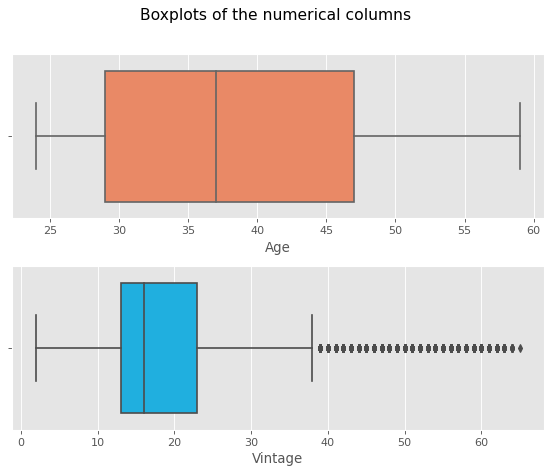

In [22]:
plt.figure(figsize = (7, 3*len(num_col)), dpi = 80)
for i in range(0, len(num_col)):
    plt.suptitle("Boxplots of the numerical columns\n", fontsize = 14)
    plt.subplot(len(num_col), 1, i+1)
    sns.boxplot(df1[num_col[i]], color = num_colour[i])
plt.tight_layout()
plt.show()

From the above boxplots of the numerical features, we see that some outliers are present in the higher end of **`Vintage`** column. Let's see that how many outliers are present in the data. 

In [23]:
quant25 = df1["Vintage"].quantile(0.25)
quant75 = df1["Vintage"].quantile(0.75)
IQR = quant75 - quant25
med = df1["Vintage"].median()
whis_high = med+(1.5*IQR)
whis_high

31.0

The value of whisker high for the **`Vintage`** is 31. Any values higher that this are outliers. We now see how many outliers are present in the data.

In [24]:
out_train = df1[df1['Vintage'] < 34]
no_of_outliers = train.shape[0] - out_train.shape[0]
print(f"Total percentage of outliers: {round((no_of_outliers/train.shape[0])*100, 2)}")

Total percentage of outliers: 10.4


### Univariate Analysis of the Categorical Features-
After the numerical columns, we look at the categorical columns one by one.

In [25]:
cat_col = list(df1.select_dtypes(include = 'category').columns)
for i in cat_col:
    print(i, df1[i].nunique())

Customer_ID 37748
Gender 2
Is_Active 2
City_Category 2
Customer_Category 3


In [26]:
c1 = ['Gender', 'Is_Active']
c2 = ['City_Category', 'Customer_Category']

In [27]:
plt.style.use('default')

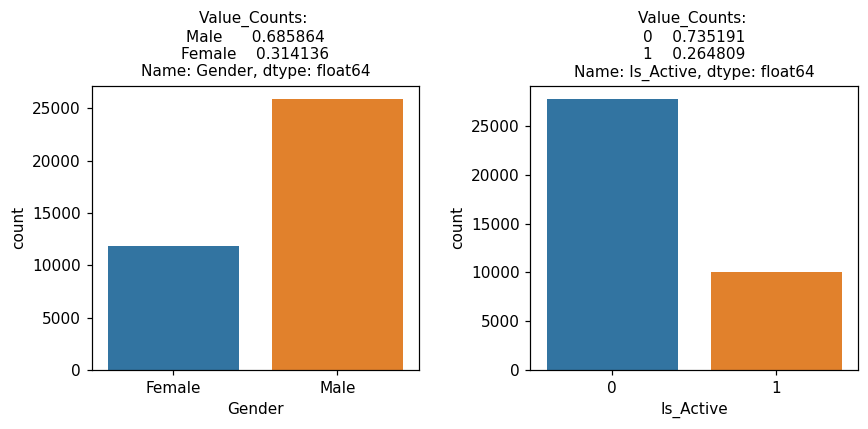

In [28]:
plt.figure(figsize = (8, 4), dpi = 110)
for i in range(len(c1)):
    plt.subplot(1, 2, i+1)
    sns.countplot(df1[c1[i]])
    plt.title(f"Value_Counts: \n{df1[c1[i]].value_counts(normalize = True)}", fontsize = 10)
plt.tight_layout(h_pad = 4, w_pad = 2)
plt.show()

From the above distribution plots, we get some important insights about the data.

* 

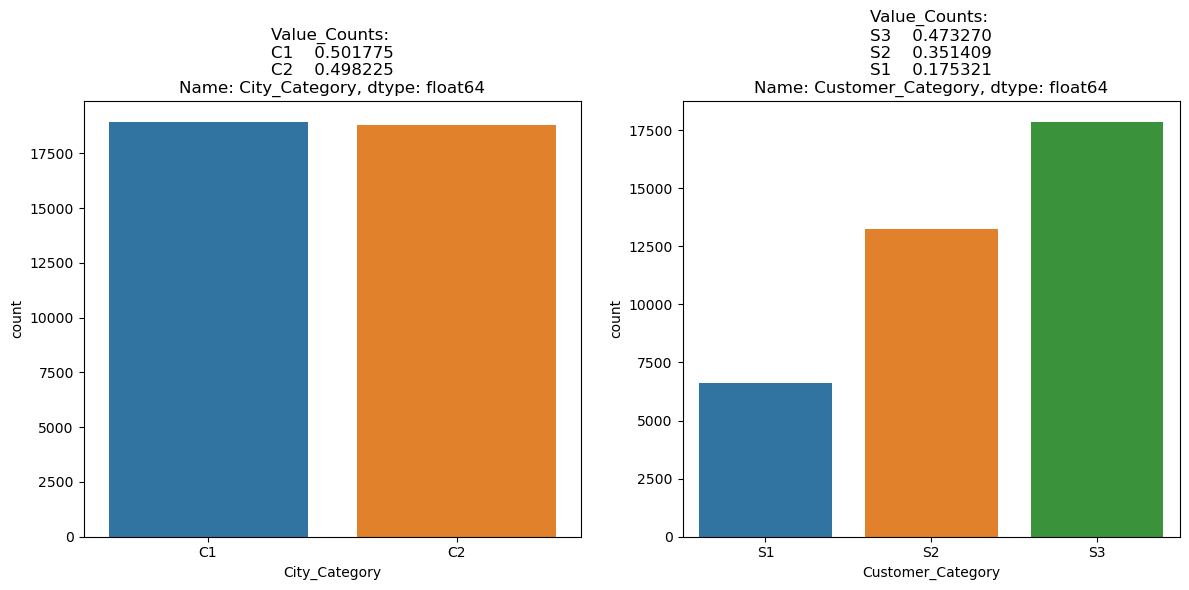

In [29]:
plt.figure(figsize = (12, 6), dpi = 100)
for i in range(len(c2)):
    plt.subplot(1, 2, i+1)
    sns.countplot(df1[c2[i]])
    plt.title(f"Value_Counts: \n{df1[c2[i]].value_counts(normalize = True)}", fontsize = 12)
plt.tight_layout(h_pad = 4, w_pad = 2)
plt.show()

In [35]:
df1.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,P0,P1,P2,...,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21
0,CC264719,Male,41,14,0,C1,S3,0,0,False,...,False,False,False,False,True,False,False,False,False,False
1,CC209679,Female,47,14,1,C1,S2,0,0,True,...,False,True,False,False,False,False,False,False,True,False
2,CC319633,Female,59,14,0,C2,S2,0,0,False,...,False,False,False,False,False,False,False,False,False,False
3,CC231413,Female,32,16,0,C1,S2,0,0,False,...,False,True,False,False,False,False,False,False,False,False
4,CC259633,Male,30,15,0,C2,S3,0,0,False,...,False,False,False,False,True,True,False,False,False,True


In [36]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [39]:
df1['Gender'] = labelencoder.fit_transform(df1['Gender'])
df1['City_Category'] = labelencoder.fit_transform(df1['City_Category'])
df1['Customer_Category'] = labelencoder.fit_transform(df1['Customer_Category'])
df1.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,P0,P1,P2,...,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21
0,CC264719,1,41,14,0,0,2,0,0,False,...,False,False,False,False,True,False,False,False,False,False
1,CC209679,0,47,14,1,0,1,0,0,True,...,False,True,False,False,False,False,False,False,True,False
2,CC319633,0,59,14,0,1,1,0,0,False,...,False,False,False,False,False,False,False,False,False,False
3,CC231413,0,32,16,0,0,1,0,0,False,...,False,True,False,False,False,False,False,False,False,False
4,CC259633,1,30,15,0,1,2,0,0,False,...,False,False,False,False,True,True,False,False,False,True
